In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import xlsxwriter

for zz in range(1,16):

    if zz < 10:
        part_number = '20'+str(zz)
    else:
        part_number = '2'+str(zz)


    # Set matplotlib parameters for displaying graphs
    sns.set_style('darkgrid')
    plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
    plt.rcParams['font.size']= 14
    pd.set_option('display.max_columns', None)

    save_dir = '../data/part'+part_number+'/figures/'

    eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
    
    data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
 
    
    rate = 2000

    data, sampling_rate = nk.read_acqknowledge(data_file)
    data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                                "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

    timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
    start_times = timestamps[int(part_number[-2:]) - 1]
    feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

    taskloads_all = np.loadtxt('../support/taskload settings/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
    taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

    durations = [100,100,100,100,100,100,100,100,100,100,100,100]
    #durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

    events = {}
    events['onset'] = start_times
    events['duration'] = durations
    events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
    events['condition'] =  taskload_settings
    #events['trust'] = trust_settings DOES NOT WORK!

    events_feedback = {}
    events_feedback['onset'] = feedback_times
    events_feedback['duration'] = durations
    events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
    events_feedback['condition'] =  taskload_settings

    eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
    


In [2]:
eda

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,-0.078044,-0.082260,-0.068686,-0.013574,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.082622,-0.082338,-0.068683,-0.013655,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.082622,-0.082417,-0.068680,-0.013737,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.081096,-0.082495,-0.068676,-0.013819,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.081096,-0.082574,-0.068673,-0.013901,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6860195,17.497029,17.558970,17.939412,-0.001224,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6860196,17.497029,17.558970,17.939412,-0.001130,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6860197,17.497029,17.558970,17.939412,-0.001036,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6860198,17.492452,17.558970,17.939412,-0.000942,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


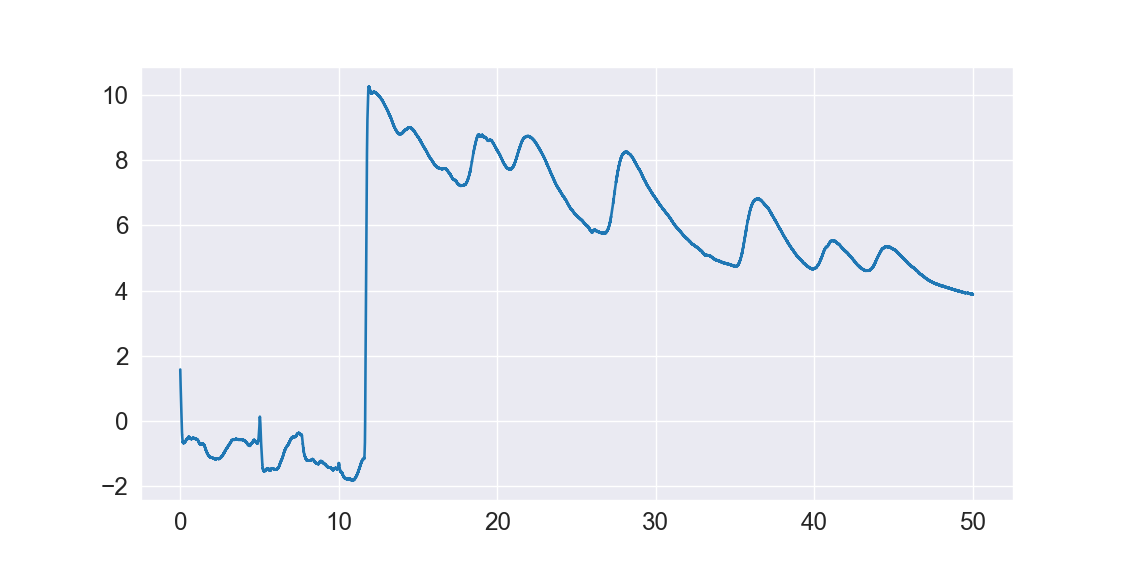

In [5]:
plt.figure()
plt.plot(eda_pilot_interval[1]['EDA_Raw'])


<IPython.core.display.Javascript object>


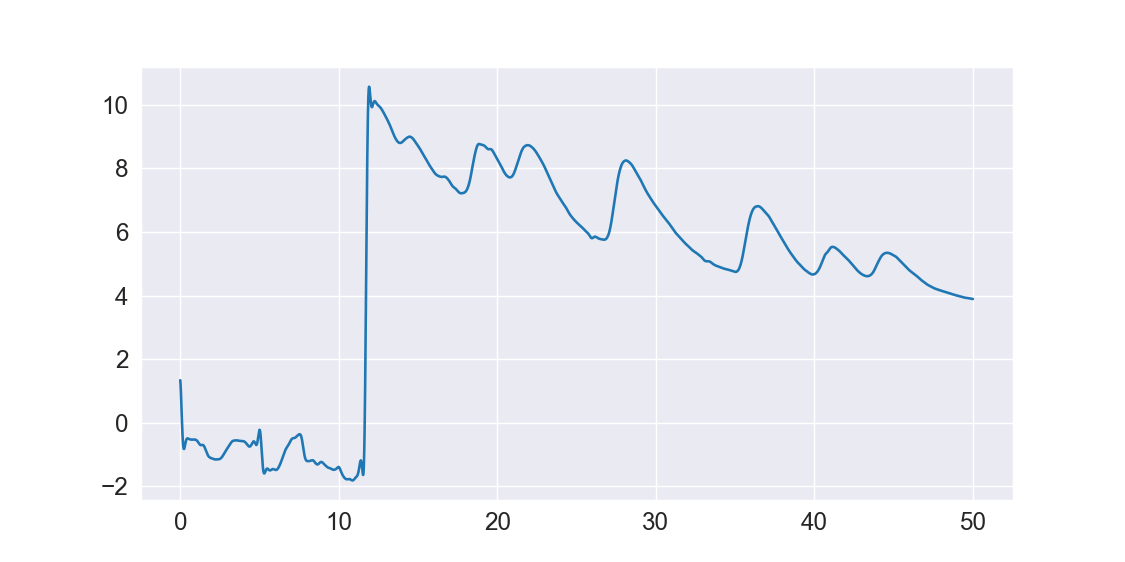

In [6]:
plt.figure()
plt.plot(eda_pilot_interval[1]['EDA_Clean'])


<IPython.core.display.Javascript object>


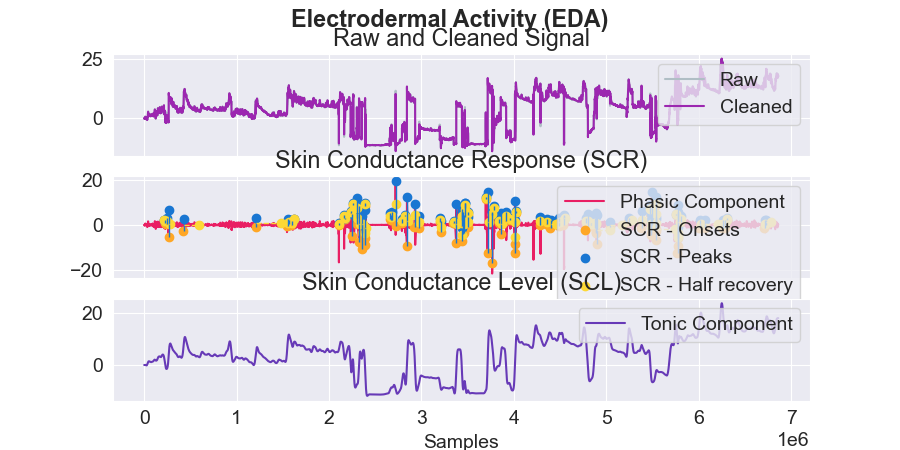

<IPython.core.display.Javascript object>


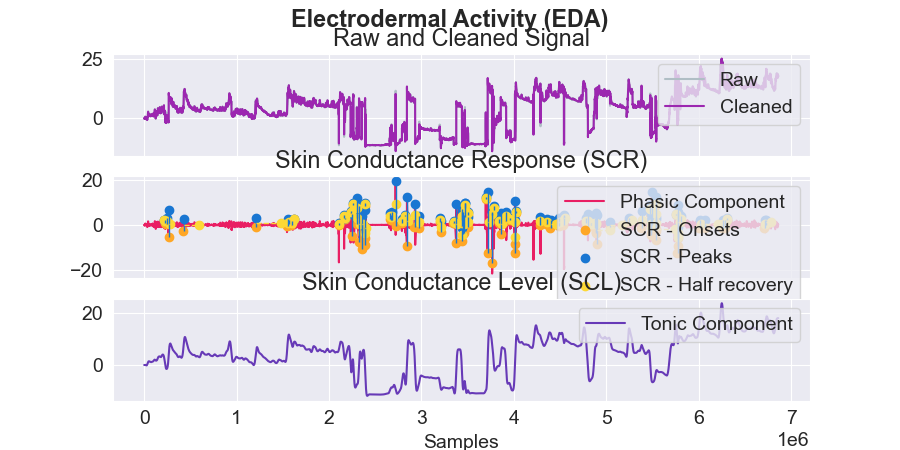

In [2]:
nk.eda_plot(eda)

In [14]:
nk.eda_plot(eda[125020:240301])

<IPython.core.display.Javascript object>

KeyError: "None of [Int64Index([88395, 98184], dtype='int64')] are in the [index]"

In [4]:
eda_pilot_interval[1]

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,Index,Label,Condition
0.0000,1.582112,1.337592,-1.603538,2.941130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241787,1,4
0.0005,1.566854,1.335147,-1.603532,2.938679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241788,1,4
0.0010,1.557698,1.332646,-1.603527,2.936173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241789,1,4
0.0015,1.545491,1.330089,-1.603522,2.933611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241790,1,4
0.0020,1.534810,1.327477,-1.603517,2.930994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241791,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.9980,3.890767,3.889484,4.339355,-0.449871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341782,1,4
49.9985,3.887715,3.889461,4.339324,-0.449863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341783,1,4
49.9990,3.889241,3.889437,4.339293,-0.449855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341784,1,4
49.9995,3.886189,3.889414,4.339261,-0.449848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341785,1,4


In [18]:
np.argmax(eda_pilot_interval[1]['SCR_Onsets']>0)

23077

<IPython.core.display.Javascript object>


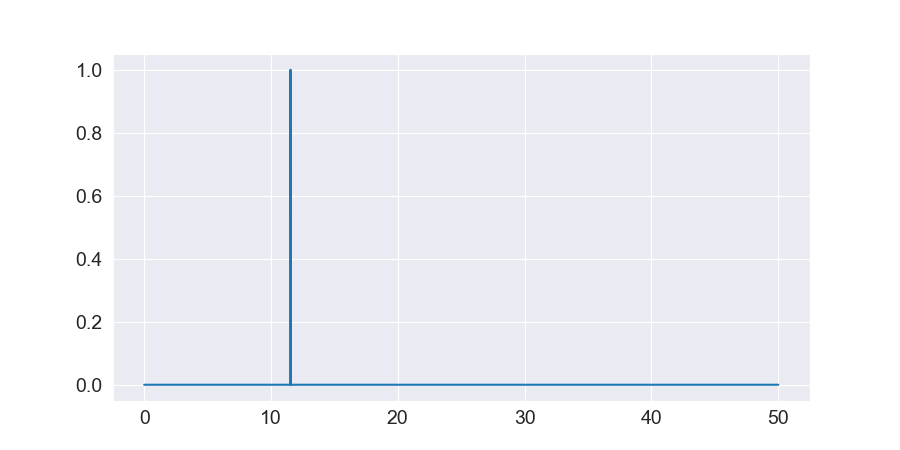

In [23]:
plt.figure()
plt.plot(eda_pilot_interval[1]['SCR_Onsets'])

In [36]:
eda_pilot_interval[1].iloc[:,:11]

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0.0000,1.582112,1.337592,-1.603538,2.941130,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0005,1.566854,1.335147,-1.603532,2.938679,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0010,1.557698,1.332646,-1.603527,2.936173,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0015,1.545491,1.330089,-1.603522,2.933611,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0020,1.534810,1.327477,-1.603517,2.930994,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49.9980,3.890767,3.889484,4.339355,-0.449871,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49.9985,3.887715,3.889461,4.339324,-0.449863,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49.9990,3.889241,3.889437,4.339293,-0.449855,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49.9995,3.886189,3.889414,4.339261,-0.449848,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
nk.eda_analyze(eda_pilot_interval[1].iloc[:,:11],2000)

,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean
0,1.0,11.806078


<IPython.core.display.Javascript object>


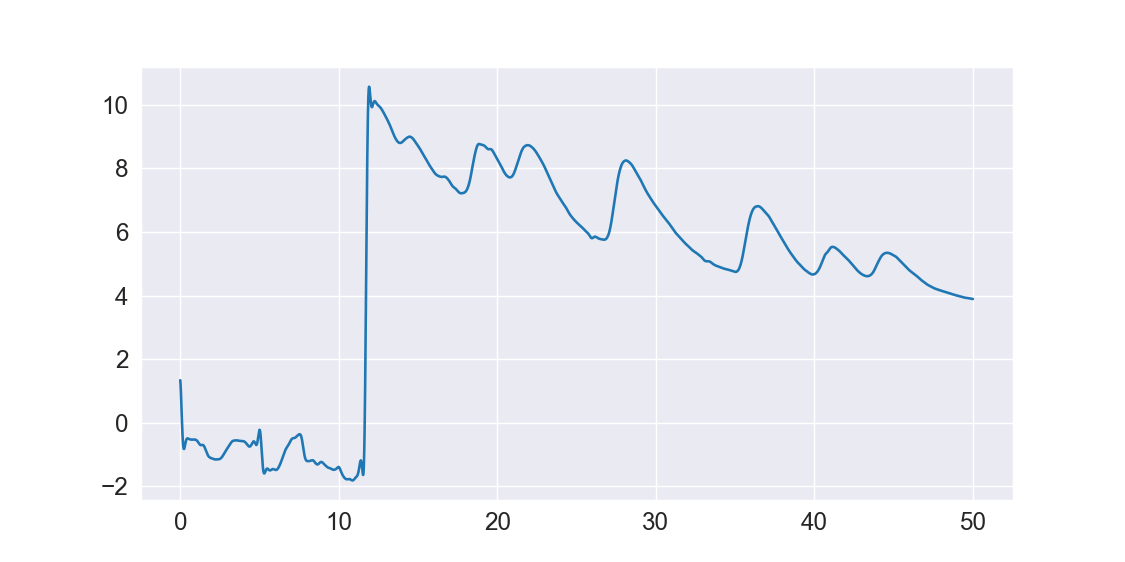

In [43]:
plt.figure()
plt.plot(eda_pilot_interval[1].iloc[:,:11]['EDA_Clean'])

In [ ]:
data = nk.eda_phasic(nk.standardize(eda_pilot_interval[1].iloc[:,:11]), 2000,'median')